In [ ]:
import matplotlib.pyplot as plt
import pylab
import librosa
import librosa.display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys

# Open a file
path = "/content/drive/MyDrive/BTP/Datasets/Sound Data/New data - Post Mids/Bus_PM"
dirs = os.listdir(path)

# This would store all images of files in given range from A to B-1 in the directory specified
for f in range(A,B):
   audio_path = path+"/"+dirs[f]
   x, sr = librosa.load(audio_path, sr=44100)
   print(type(x), type(sr))
   duration = round(librosa.get_duration(x, sr=sr))
   print(duration)
   a = [0 for i in range(duration)]
   for i in range(duration):
      a[i] = x[round((x.shape[0]/duration)*(i)):round((x.shape[0]/duration)*(i))]
   
   mfccs_arr = [0 for i in range(duration)]
   for i in range(duration):
    mfccs_arr[i] = librosa.feature.mfcc(a[i], sr=sr)
    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    librosa.display.specshow(mfccs_arr[i], sr=sr, x_axis='time', y_axis='mel')
    pylab.savefig("/content/drive/MyDrive/BTP/Datasets/Features Used - Classifcation/NewData - Features/MFCC_1sec_New_Data/Bus/"+dirs[f][:-4]+"("+str(i+4073)+")"+".jpg", bbox_inches=None, pad_inches=0)
    pylab.close()
    

------- IGNORE BELOW ------------

Testing for Individual Files

In [ ]:
import numpy as np

In [ ]:
audio_path = "/content/drive/MyDrive/BTP/Datasets/Sound Data/Car/Set 1/1GR30.wav"
x , sr = librosa.load(audio_path)
print(type(x), type(sr))


<class 'numpy.ndarray'> <class 'int'>


In [ ]:
print(sr)

22050


In [ ]:
print(x.shape)

(8810496,)


In [ ]:
librosa.load(audio_path, sr=44100)

(array([-0.000824, -0.001099, -0.001373, -0.001495, ...,  0.006836,  0.006348,  0.006409,  0.006317], dtype=float32),
 44100)

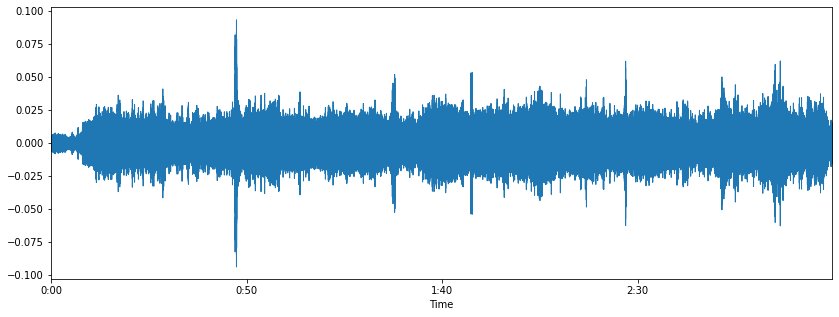

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### STFT

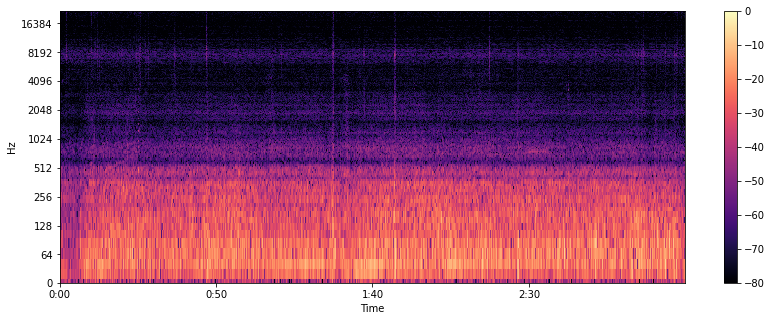

In [ ]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X), ref = np.max)
plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to print log of frequencies  
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


### Testing for 1 sec of data

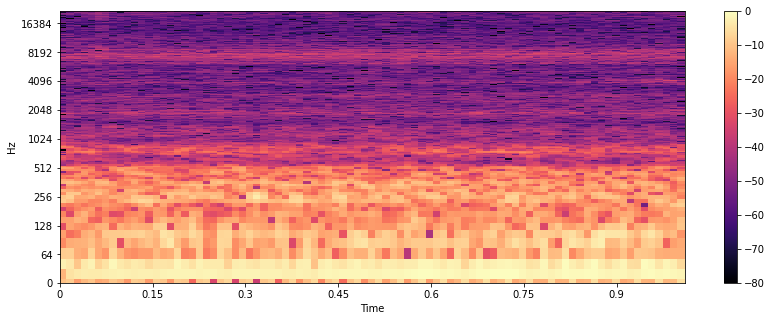

In [ ]:
duration = round(librosa.get_duration(x, sr=sr))
x_test = x[0:round((x.shape[0]/duration)*(1))]
xt_stft = librosa.stft(x_test)
Xdb_test = librosa.amplitude_to_db(abs(xt_stft), ref = np.max)
plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to print log of frequencies  
librosa.display.specshow(Xdb_test, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Mel Spectrogram

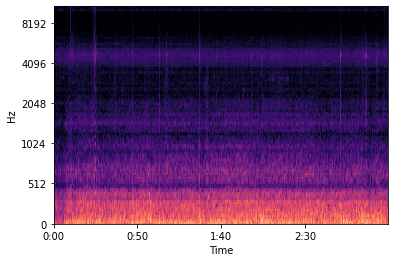

In [ ]:
mel_spect_arr = librosa.feature.melspectrogram(x, sr=sr)
log_S = librosa.power_to_db(mel_spect_arr, ref=np.max)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

### Spectral Contrast

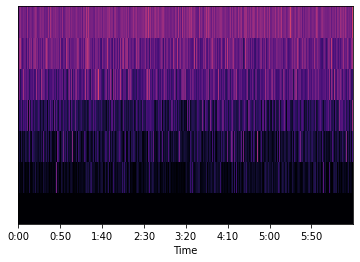

In [ ]:
S = np.abs(librosa.stft(x))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
librosa.display.specshow(contrast, x_axis='time')

In [ ]:
duration = round(librosa.get_duration(x, sr=sr))
print(duration)
print(x.shape)


1200
(26460000,)


In [ ]:
a = [0 for i in range(duration)]
for i in range(duration):
    a[i] = x[round((x.shape[0]/duration)*i):round((x.shape[0]/duration)*(i+1))]

In [ ]:
mfccs_arr = [0 for i in range(duration)]
for i in range(duration):
    mfccs_arr[i] = librosa.feature.mfcc(a[i], sr=sr)
    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    librosa.display.specshow(mfccs_arr[i], sr=sr, x_axis='time', y_axis='mel')
    pylab.savefig("/content/drive/MyDrive/BTP/Datasets/MFCC_Classification_1sec/Bus/Bus1."+"("+str(i)+").jpg", bbox_inches=None, pad_inches=0)
    pylab.close()


In [ ]:
from google.colab import drivesc
drive.mount('/content/drive')

Mounted at /content/drive
